In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
image_size = (224, 224)
batch_size = 32        
seed = 123               

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset='training',
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset='validation',
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

Found 27159 files belonging to 10 classes.
Using 21728 files for training.
Found 27159 files belonging to 10 classes.
Using 5431 files for validation.


In [4]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

Class Names: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax') 
])

C:\Users\Abhishek Pal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15
)

Epoch 1/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 348s 510ms/step - accuracy: 0.4339 - loss: 1.5528 - val_accuracy: 0.5664 - val_loss: 1.1255
Epoch 2/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 336s 495ms/step - accuracy: 0.5802 - loss: 1.0883 - val_accuracy: 0.6010 - val_loss: 1.0329
Epoch 3/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 1104s 2s/step - accuracy: 0.6266 - loss: 0.9859 - val_accuracy: 0.6220 - val_loss: 1.0236
Epoch 4/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 3279s 5s/step - accuracy: 0.6682 - loss: 0.8841 - val_accuracy: 0.6386 - val_loss: 1.0042
Epoch 5/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 2267s 3s/step - accuracy: 0.7116 - loss: 0.7735 - val_accuracy: 0.6406 - val_loss: 1.0700
Epoch 6/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 387s 570ms/step - accuracy: 0.7574 - loss: 0.6482 - val_accuracy: 0.6303 - val_loss: 1.1778
Epoch 7/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 1787s 3s/step - accuracy: 0.8086 - loss: 0.5283 - val_accuracy: 0.6413 - val_loss: 1.2999
Epoch 8/15
679/679 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.8454 - loss: 0.41

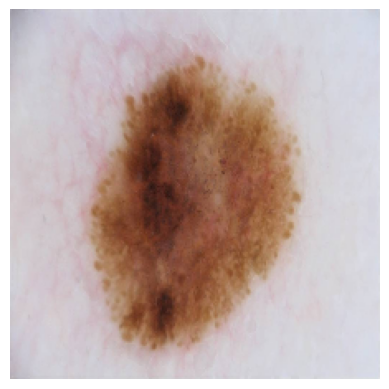

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: 5. Melanocytic Nevi (NV) - 7970 (100.00%)


In [20]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = predictions[0][predicted_index] * 100

    print(f"Predicted Class: {predicted_class} ({confidence:.2f}%)")

predict_image('dataset-Copy1/5. Melanocytic Nevi (NV) - 7970/ISIC_0000008.jpg')

In [25]:
model.save('skin_disease_classifier_model.h5')